In [16]:
import os
from typing import Dict, List, Tuple
import torch
from torch import Tensor, nn

import detectron2.data.transforms as T
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2.data import build_detection_test_loader, detection_utils
from detectron2.evaluation import COCOEvaluator, inference_on_dataset, print_csv_format
from detectron2.export import (
    Caffe2Tracer,
    TracingAdapter,
    add_export_config,
    dump_torchscript_IR,
    scripting_with_instances,
)
from detectron2.modeling import GeneralizedRCNN, RetinaNet, build_model
from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.projects.point_rend import add_pointrend_config
from detectron2.structures import Boxes
from detectron2.utils.env import TORCH_VERSION
from detectron2.utils.file_io import PathManager
from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultPredictor

import matplotlib.pyplot as plt
import numpy as np

from detectron2.utils.visualizer import Visualizer
from PIL import Image
import random


In [9]:
model_path = '/home/vai_voxelsafety_com/models/detectron/50_epoch_5_class/mymodel_after.pth'

In [25]:
import detectron2 
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = '/home/vai_voxelsafety_com/models/detectron/50_epoch_5_class/mymodel_after.pth'
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5
print(cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95  # set the testing threshold for this model

predictor = DefaultPredictor(cfg)

0.05


In [26]:
def visualize_detection(img):
    rgb_image = img
    outputs = predictor(rgb_image)

    # visualise
#     v = Visualizer(rgb_image[:, :, ::-1], scale=1.2)
    v = Visualizer(rgb_image, scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure()
    plt.imshow(v.get_image())

In [27]:
positive_dir = '/data/detectron2/scenario_test/hardhat/hat'
positive_filenames = os.listdir(positive_dir)[:10]

# Negative Samples
negative_dir = '/data/detectron2/scenario_test/hardhat/no_hat'
negative_filenames = os.listdir(negative_dir)[:10]


uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_50315_frame_13_119205.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_47588_frame_4_120050.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_negative_47991_frame_11_118164.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_51065_frame_4_119458.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_48705_frame_4_119454.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_negative_51808_frame_5_117963.jpg
255
uscold_laredo_dock04_cha_scenarios_HARD_HAT_positive_43650_frame_26_119630.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_negative_51808_frame_2_117471.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_47622_frame_2_120217.jpg
255
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_47622_frame_13_120176.jpg
255


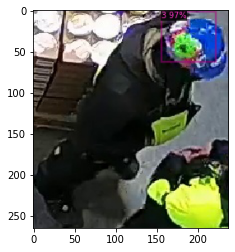

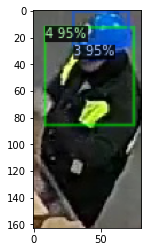

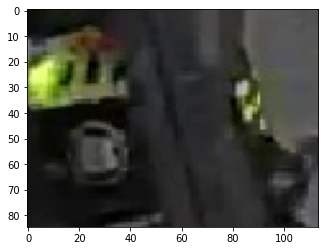

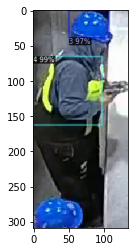

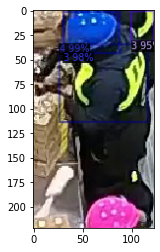

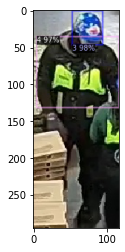

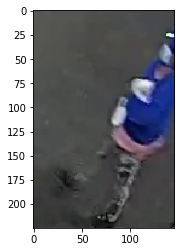

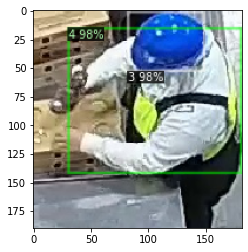

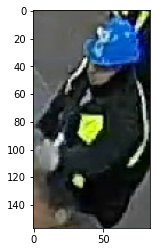

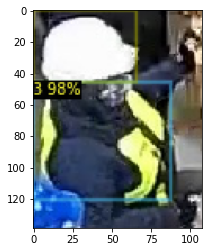

In [28]:
# Randomly visualize 10 positive samples

for filename in positive_filenames:
    print(filename)
    #cv2.imread(os.path.join(positive_dir, filename))
    img = Image.open(os.path.join(positive_dir, filename)) 
    img = np.asarray(img)
    print(np.max(img))
    visualize_detection(img)

uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_48705_frame_2_120585.jpg
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_48705_frame_21_120585.jpg
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_50347_frame_21_120084.jpg
uscold_laredo_dock04_cha_scenarios_HARD_HAT_negative_59882_frame_10_117724.jpg
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_48705_frame_9_120585.jpg
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_48705_frame_20_120585.jpg
uscold_laredo_dock03_cha_scenarios_HARD_HAT_positive_56976_frame_16_118029.jpg
uscold_laredo_dock01_cha_scenarios_HARD_HAT_positive_47622_frame_11_120188.jpg
uscold_laredo_dock01_cha_scenarios_HARD_HAT_negative_51494_frame_2_119692.jpg
uscold_laredo_dock03_cha_scenarios_HARD_HAT_positive_50353_frame_4_117808.jpg


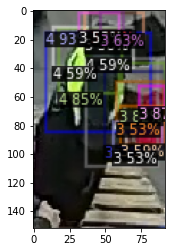

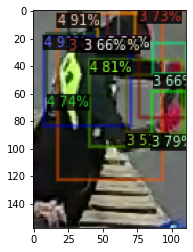

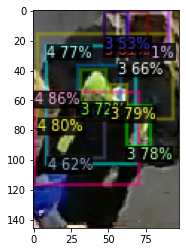

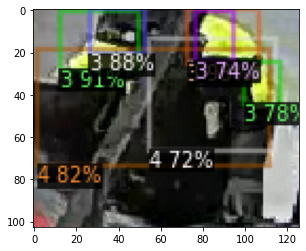

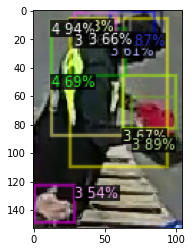

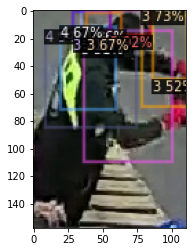

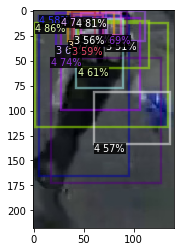

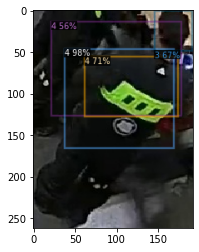

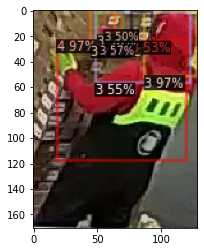

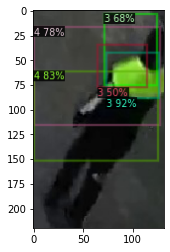

In [20]:
for filename in negative_filenames:
    print(filename)
#     img = cv2.imread(os.path.join(negative_dir, filename))
    img = Image.open(os.path.join(negative_dir, filename)) 
    img = np.asarray(img)
    visualize_detection(img)